<a href="https://colab.research.google.com/github/amalsalilan/DataInsight_Sales_Data_Analysis_and_Visualization_Infosys_Internship_Dec2024/blob/Akshaya_R/ProphetForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from google.colab import files
uploaded = files.upload()
data = pd.read_excel('walmart Retail Data.xlsx')


Saving walmart Retail Data.xlsx to walmart Retail Data (1).xlsx


In [14]:
df=data[['Order Date','Sales']]

df.isnull().sum()

,0
Order Date,0
Sales,0


In [15]:
df_prophet = df[['Order Date', 'Sales']].copy()
df_prophet.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])


In [16]:
df_weekly = df_prophet.resample('W', on='ds').sum().reset_index()

df_weekly.head()

,ds,y
0,2012-01-01,1052.8400
1,2012-01-08,193971.4365
2,2012-01-15,100202.6600
3,2012-01-22,120648.7240
4,2012-01-29,63851.8890


In [18]:
split_point = int(len(df_weekly) *0.8)

train_data = df_weekly[:split_point]
test_data = df_weekly[split_point:]

#display the range of dates for training and testing sets
train_date_range = (train_data['ds'].min(), train_data['ds'].max())
test_date_range = (test_data['ds'].min(), test_data['ds'].max())

train_date_range, test_date_range

((Timestamp('2012-01-01 00:00:00'), Timestamp('2015-03-15 00:00:00')),
 (Timestamp('2015-03-22 00:00:00'), Timestamp('2016-01-03 00:00:00')))

In [19]:
train_date_range

(Timestamp('2012-01-01 00:00:00'), Timestamp('2015-03-15 00:00:00'))

In [20]:

test_date_range

(Timestamp('2015-03-22 00:00:00'), Timestamp('2016-01-03 00:00:00'))

In [21]:
from prophet import Prophet

model = Prophet()

model.fit(train_data)

future = model.make_future_dataframe(periods=12, freq='W-MON')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg26whzme/_n61oz2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg26whzme/vsapc6b_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6990', 'data', 'file=/tmp/tmpg26whzme/_n61oz2w.json', 'init=/tmp/tmpg26whzme/vsapc6b_.json', 'output', 'file=/tmp/tmpg26whzme/prophet_model0js17_qt/prophet_model-20250123111207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
175,2015-05-04,63692.413274,27424.758663,95949.641372
176,2015-05-11,55309.502709,19789.458195,89764.672349
177,2015-05-18,51912.731147,15285.116551,87597.562216
178,2015-05-25,52433.482752,15640.408380,88286.333050
179,2015-06-01,50794.745803,13691.016700,85486.647039


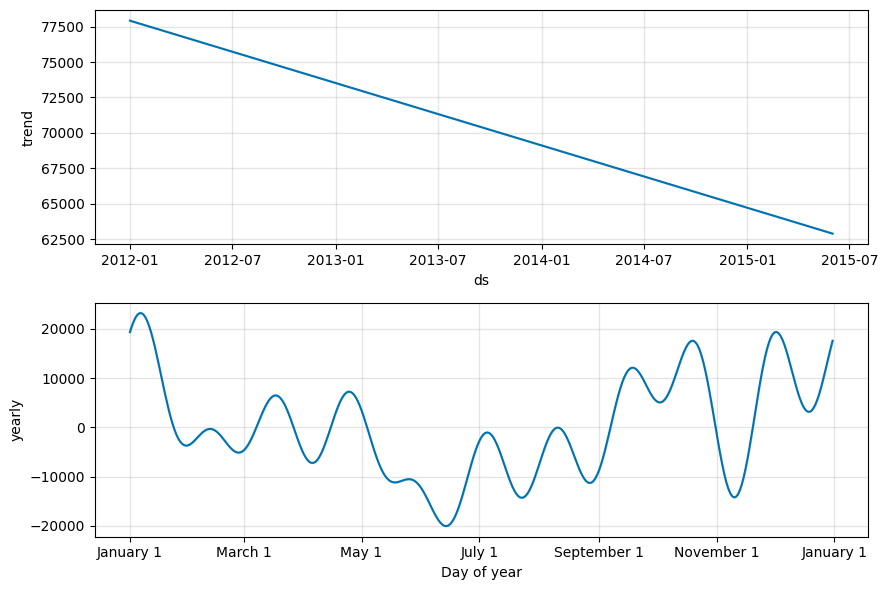

In [22]:
fig = model.plot_components(forecast)
plt.show()

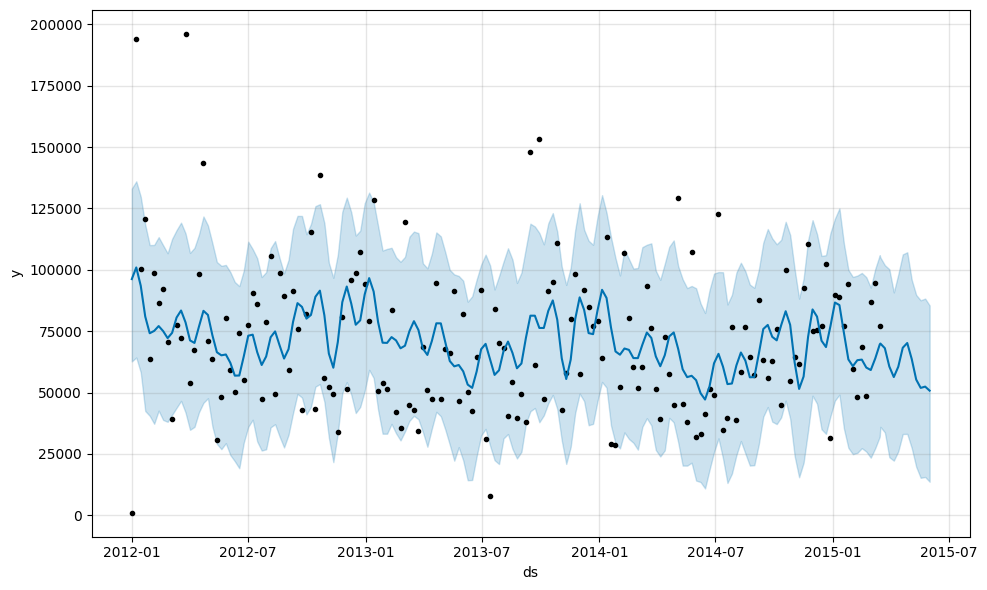

In [23]:
fig = model.plot(forecast)
fig.show()

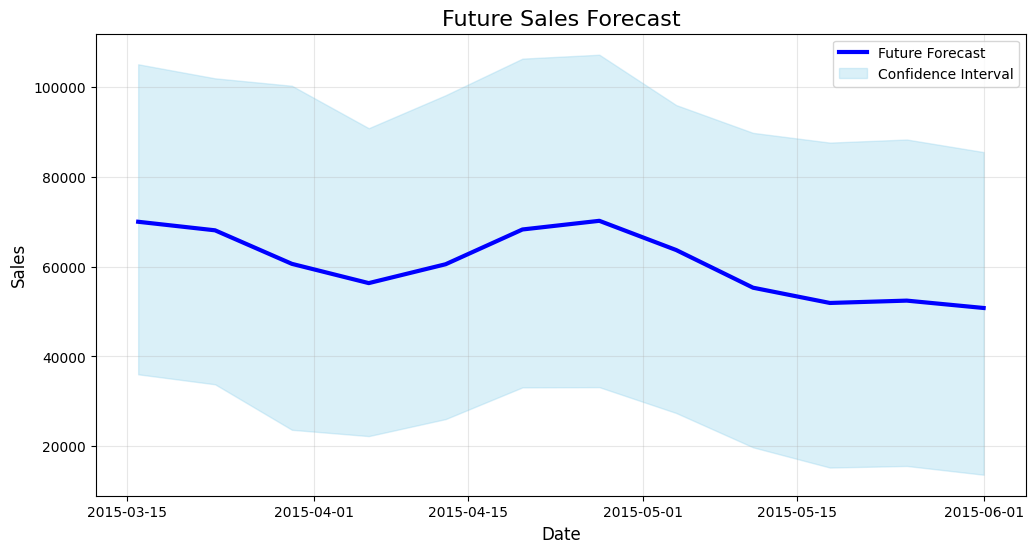

In [24]:
future_forecast = forecast[forecast['ds'] > train_data['ds'].max()]

if future_forecast.empty:
    print("No future data available for plotting. Please check the filtering logic.")
else:

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(
        future_forecast['ds'],
        future_forecast['yhat'],
        label='Future Forecast',
        color='blue',
        linewidth=3,
        linestyle='-'
    )

    ax.fill_between(
        future_forecast['ds'],
        future_forecast['yhat_lower'],
        future_forecast['yhat_upper'],
        color='skyblue',
        alpha=0.3,
        label='Confidence Interval'
    )

    ax.set_title('Future Sales Forecast', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Sales', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

    plt.show()


Enter the number of weeks to forecast: 10
            ds          yhat    yhat_lower     yhat_upper
168 2015-03-16  69983.638460  33661.858398  106837.848073
169 2015-03-23  68080.106372  29866.405497  102939.334019
170 2015-03-30  60616.884197  23343.719713   96120.177753
171 2015-04-06  56331.829422  18014.376568   92279.377855
172 2015-04-13  60529.757548  25092.067640   98337.154560
173 2015-04-20  68266.195784  33587.313447  103411.916162
174 2015-04-27  70193.412292  33345.841288  108481.364909
175 2015-05-04  63692.413274  28203.475749   98481.095154
176 2015-05-11  55309.502709  19654.730127   91870.586394
177 2015-05-18  51912.731147  14577.832938   85132.307406


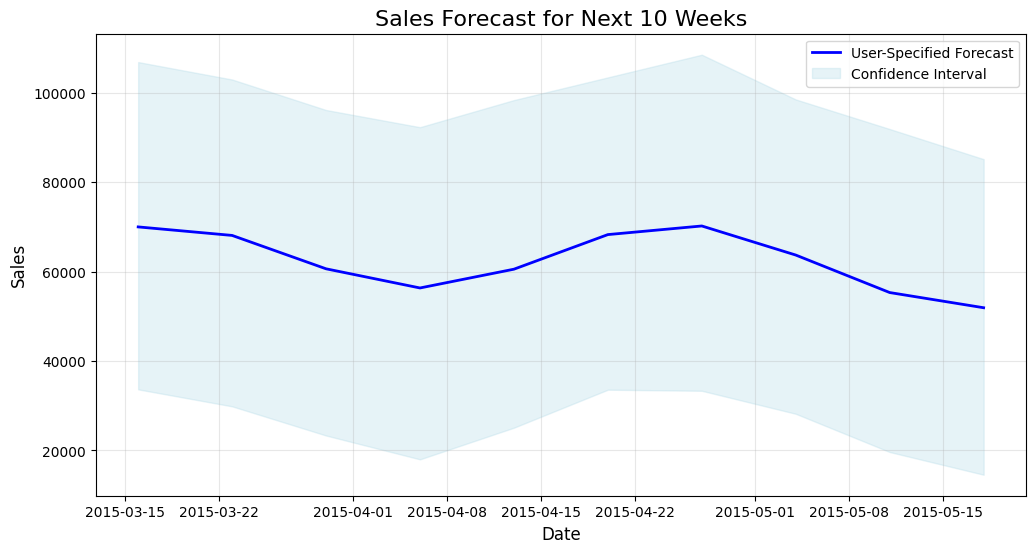

In [25]:
import datetime

input_weeks = int(input("Enter the number of weeks to forecast: "))

future = model.make_future_dataframe(periods=input_weeks, freq='W-MON')

forecast = model.predict(future)

last_date = train_data['ds'].max()
future_forecast = forecast[forecast['ds'] > last_date]

print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(
    future_forecast['ds'],
    future_forecast['yhat'],
    label='User-Specified Forecast',
    color='blue',
    linewidth=2
)

ax.fill_between(
    future_forecast['ds'],
    future_forecast['yhat_lower'],
    future_forecast['yhat_upper'],
    color='lightblue',
    alpha=0.3,
    label='Confidence Interval'
)

ax.set_title(f"Sales Forecast for Next {input_weeks} Weeks", fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.show()